imports    

In [1]:
pip install scikit-learn    
kjhskuhedg    

Note: you may need to restart the kernel to use updated packages.


In [2]:
# None linear
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as rmse

import time
import sys
import math
from math import ceil
from math import floor

In [3]:
# None linear
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as rmse

import time
import sys
import math
from math import ceil
from math import floor

Get data

In [4]:
import itertools
def get_permutations(config_dic):
# Get values for each key
    values = config_dic.values()
    pairs = []
# Generate pairs of values
    for combination in itertools.product(*values):
        pairs.append(list(combination))

# Display the pairs
    permute_dics = []
    for pair in pairs:
        permute_dics.append({k: v for k, v in zip(config_dic.keys(), pair)})

    return permute_dics

def print_dict_verticaly(dict_):
  for key, value in dict_.items():
    print(f"{key}: {value}")

def print_list_vertically(list_):
  vertical_string = '\n'.join(str(element) for element in list_)
  print(vertical_string)

def filter_func_params(func_params,params):
  params_filtered = {}
  for name in params:
    if (name in func_params):
      params_filtered.update({name: params[name]})

  return params_filtered

def generate_colors(num_colors):
    cmap = plt.get_cmap('tab10')  # You can use different colormaps like 'tab10', 'viridis', 'Set1', etc.
    colors = [cmap(i) for i in range(num_colors)]
    return colors


In [5]:
import itertools
def get_permutations(config_dic):
# Get values for each key
    values = config_dic.values()
    pairs = []
# Generate pairs of values
    for combination in itertools.product(*values):
        pairs.append(list(combination))

# Display the pairs
    permute_dics = []
    for pair in pairs:
        permute_dics.append({k: v for k, v in zip(config_dic.keys(), pair)})

    return permute_dics

def print_dict_verticaly(dict_):
  for key, value in dict_.items():
    print(f"{key}: {value}")

def print_list_vertically(list_):
  vertical_string = '\n'.join(str(element) for element in list_)
  print(vertical_string)

def filter_func_params(func_params,params):
  params_filtered = {}
  for name in params:
    if (name in func_params):
      params_filtered.update({name: params[name]})

  return params_filtered

def generate_colors(num_colors):
    cmap = plt.get_cmap('tab10')  # You can use different colormaps like 'tab10', 'viridis', 'Set1', etc.
    colors = [cmap(i) for i in range(num_colors)]
    return colors


PREDICTOR class

In [6]:
class PREDICTOR():
    def __init__(self,name = None):
      self.model = None
      self.name = name
      self.params = None
      self.stats = {}

    def train_test_split(X,y):
      X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.33, random_state=42)

      return X_train, X_test, y_train, y_test


    def fit(self, X, y,type,params={}):
      if (len(params)==0):
        params = {}
      self.params = params

      if (1):
      # try:
        if (type=='linear_regression'):
          params_filtered = filter_func_params(LinearRegression().get_params(),params)
          self.model = LinearRegression(**params_filtered)

        elif (type=='decision_tree'):
          params_filtered = filter_func_params(DecisionTreeRegressor().get_params(),params)
          self.model = DecisionTreeRegressor(**params_filtered)

        elif (type=='knn'):
          params_filtered = filter_func_params(KNeighborsRegressor().get_params(),params)
          self.model = KNeighborsRegressor(**params_filtered)
            
        elif (type=='lasso'):
          params_filtered = filter_func_params(Lasso().get_params(),params)
          self.model = Lasso(**params_filtered)
                
        elif (type=='ridge'):
          params_filtered = filter_func_params(Ridge().get_params(),params)
          self.model = Ridge(**params_filtered)                
            
        self.model.fit(X, y)
      return 1

      # except:
      #   print(f'{type} fit failed due to wrong parameterization:{params}')
      #   return 0


    def predict(self, X):
        y_pred = self.model.predict(X)        
        return y_pred


    def plot_prediction(self,X,y,y_pred=None,axes=None):
        print('kuku')
        if (axes is None):
            fig, axes = plt.subplots(nrows=1, ncols=1)

        if (y_pred is None):
            y_pred = self.predict(X)

        axes.scatter(y, y_pred, color='blue', label='Actual Data',s=5)
        
        axes.legend()
        params_string = self.create_params_string()
        axes.set_title(self.name+':'+params_string,fontsize=8)
        x_limits = axes.get_xlim()
        y_limits = axes.get_ylim()
        x_corr = abs(x_limits[1]-x_limits[0])*0.9+x_limits[0]
        y_corr = abs(y_limits[1]-y_limits[0])*0.1+y_limits[0]
        RMSE = self.evaluate(y,y_pred)
        axes.text(x_corr,y_corr,f'RMSE={RMSE:.3f}',horizontalalignment='center',fontsize=8)

    def evaluate(self,y, y_pred,str=''):
        if (str != ''):
          str = '_' + str
        self.stats.update({'rmse'+str:rmse(y, y_pred)})
        return self.stats

    def create_params_string(self):
      params_string = ''
      for key, value in self.params.items():
        params_string = params_string+f'{key}={value}'
      return params_string

AI_PIPE_LINE class

In [7]:
class AI_PIPE_LINE():
  def __init__(self,name = None):
    self.df = None
    self.params_permutes_dic = None
    self.predictors = {}
    self.stats = {}

  def prepare_data(self,df):
    self.df = df

  def train_test_split(self,X_columns,y_column,params={}):
    # params_filtered = filter_func_params(train_test_split().get_params(),params)
    params_filtered = {}
    X = self.df[X_columns]
    # if (len(X_columns)==1):
    #   X = X.reshape(-1,1)

    y = self.df[y_column]


    X_train, X_test, y_train, y_test = train_test_split(X,y,**params_filtered)
    return X_train, X_test, y_train, y_test

  def get_permutations(self,config_dic):
  # Get values for each key
      values = config_dic.values()
      pairs = []

  # Generate pairs of values
      for combination in itertools.product(*values):
          pairs.append(list(combination))

  # Display the pairs
      params_permutes_dic = []
      for pair in pairs:
          params_permutes_dic.append({k: v for k, v in zip(config_dic.keys(), pair)})

      self.params_permutes_dic = params_permutes_dic
      return params_permutes_dic

  def add_predictor(self,name=None):
    if (name is None):
      name = f'model_{len(self.predictors)}'

    predictor = PREDICTOR(name)
    self.predictors.update({name:predictor})
    return predictor



  def get_stats(self,stat_names=None):
    stats = {}

    for stat_name in stat_names:
      stats.update({stat_name:[]})
      for name in self.predictors.keys():
        stats_pred = self.predictors[name].stats
        stats[stat_name].append(stats_pred[stat_name])

      self.stats = stats
    return stats


  def plot_stats(self,stats_names):
    fig = plt.figure()
    colors = generate_colors(len(stats_names))
    idx = 0
    for stat_name in stats_names:
      stat = self.stats[stat_name]
      plt.plot(stat,color=colors[idx])
      idx+=1

    plt.legend(stats_names)
    
    def filter_predictors(self, filter_dic):
        filtered_predictor = self.predictors
        return filtered_predictors

Project

In [8]:
file_path = "./data/X.csv"
X = pd.read_csv(file_path)

file_path = "./data/y.csv"
y = pd.read_csv(file_path)


In [9]:
df = X.join(y.set_index('id'))

df_mod = df

# clear all null lines
for column in df_mod.columns:
    nulls_mask = df_mod[column].notnull()  # or column_with_nulls.isna()
    df_mod = df_mod[nulls_mask]

# rename unnamed columns
df_mod.rename(columns={'Unnamed: 0.1': 'col1'}, inplace=True)
df_mod.drop(columns='Unnamed: 0', inplace=True)

# deal with categorial columns

# get all relevant column names
categorical_columns = df_mod.select_dtypes(include=['object']).columns.tolist()

drop_categorial = True
if (drop_categorial):
    df_mod = df_mod.drop(columns=categorical_columns)
else:
    # drop some of them
    categorical_columns_remove = 'Job Title'
    categorical_columns = [item for item in categorical_columns if item != categorical_columns_remove]


    df_mod = pd.get_dummies(df_mod,columns = categorical_columns)




df = df_mod


kuku


TypeError: unsupported format string passed to dict.__format__

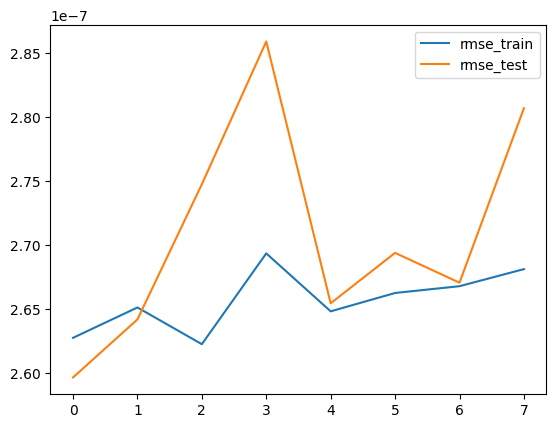

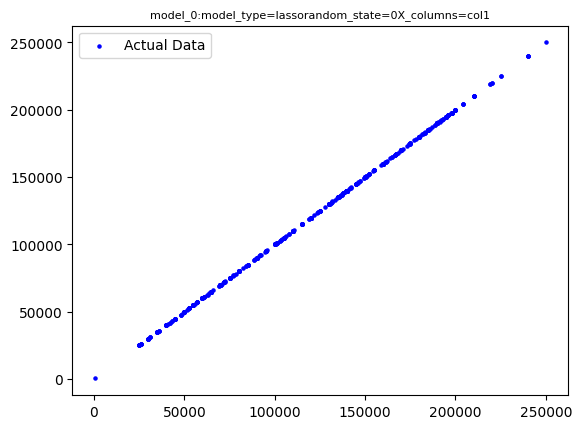

In [10]:
AI_pipe_line = AI_PIPE_LINE()

AI_pipe_line.prepare_data(df)

X_columns = df.columns.drop('Salary')
X_columns = [item for item in df.columns if item not in categorical_columns]

y_cloumn = 'Salary'

# linear regression on single features
params_config_dic = {
                     'model_type':['linear_regression'],
                     'random_state':[0],
                     'X_columns':X_columns
                     }

params_permutes_list = AI_pipe_line.get_permutations(params_config_dic)
# Lasso regression on multiple featrures

params_config_dic = {
                     'model_type':['lasso'],
                     'random_state':[0],
                     'X_columns':X_columns
                     }

params_permutes_list = AI_pipe_line.get_permutations(params_config_dic)


# split to train and test



for params_dic in params_permutes_list:
    X_train, X_test, y_train, y_test = AI_pipe_line.train_test_split(X_columns,y_cloumn)

    # create predictor
    predictor = AI_pipe_line.add_predictor()

    # fit model
    predictor.fit(X_train, y_train,params_dic['model_type'],params_dic)

    # predict and eval on train
    y_train_predict = predictor.predict(X_train)
    stats = predictor.evaluate(y_train,y_train_predict,'train')

    # predict and eval on test
    y_test_predict = predictor.predict(X_test)
    stats = predictor.evaluate(y_test,y_test_predict,'test')


# filter the predictors
# predictors_filter = {'model_type':'linear_regression'}    
    
# collect the stats from all the predictors
stats = AI_pipe_line.get_stats(['rmse_train','rmse_test'])

AI_pipe_line.plot_stats(stats_names=['rmse_train','rmse_test'])

AI_pipe_line.predictors['model_0'].plot_prediction(X_test,y_test,axes=None)


In [ ]:
AI_pipe_line.predictors['model_0'].plot_prediction(X_test,y_test,axes=None)


In [ ]:
AI_pipe_line.predictors
